# PIPELINE PENGOLAHAN DATA

<h3>
<br>1. Data Preparation
<br>2. Data Cleansing
<br>3. Exploratory Data Analysis
<br>4. Feature Engineering
<h3>

## 1. Data Preparation

In [1]:
# Libraries yang digunakan
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [2]:
# Mengambil data dari sumber
cars_data = pd.read_csv('C:/Users/nubiw/Downloads/Tugas 4 Wrangling/Tugas 4 Wrangling/data-20220717T050452Z-001/data/autos.csv', encoding='latin-1')

In [3]:
# Melihat tampilan data
cars_data.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


In [4]:
# Menampilkan info statistik data
cars_data.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [5]:
# Melihat jumlah & tipe data by kolom
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [6]:
# Menampilkan persentasi data kosong
(cars_data.isnull().sum()/len(cars_data))*100

dateCrawled             0.000
name                    0.000
seller                  0.000
offerType               0.000
price                   0.000
abtest                  0.000
vehicleType            10.190
yearOfRegistration      0.000
gearbox                 5.360
powerPS                 0.000
model                   5.516
odometer                0.000
monthOfRegistration     0.000
fuelType                8.964
brand                   0.000
notRepairedDamage      19.658
dateCreated             0.000
nrOfPictures            0.000
postalCode              0.000
lastSeen                0.000
dtype: float64

## 2. Data Cleansing

In [7]:
# Memperbaiki penulisan kolom data (camelCase ke snake_case)
new_column = {"dateCreated": "ad_created", 
              "dateCrawled": "date_crawled",
              "fuelType": "fuel_type",
              "lastSeen": "last_seen",
              "monthOfRegistration": "registration_month",
              "notRepairedDamage": "unrepaired_damage",
              "nrOfPictures": "num_of_pictures",
              "offerType": "offer_type",
              "postalCode": "postal_code",
              "powerPS": "power_ps",
              "vehicleType": "vehicle_type",
              "yearOfRegistration": "registration_year"}

cars_data.rename(new_column, axis=1, inplace=True)

In [8]:
# Mengubah tipe data berupa tanggal ke tipe datetime64
cars_data["ad_created"] = pd.to_datetime(cars_data["ad_created"], format='%Y-%m-%d %H:%M:%S')
cars_data["date_crawled"] = pd.to_datetime(cars_data["date_crawled"], format='%Y-%m-%d %H:%M:%S')
cars_data["last_seen"] = pd.to_datetime(cars_data["last_seen"], format='%Y-%m-%d %H:%M:%S')

cars_data[["ad_created", "date_crawled", "last_seen"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ad_created    50000 non-null  datetime64[ns]
 1   date_crawled  50000 non-null  datetime64[ns]
 2   last_seen     50000 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 1.1 MB


In [9]:
# Memperbaiki kolom 'price'
cars_data["price"] = cars_data["price"].str.replace("\D", "", regex=True)
cars_data["price"] = cars_data["price"].astype(str).astype('int64')
cars_data["price"]

0         5000
1         8500
2         8990
3         4350
4         1350
         ...  
49995    24900
49996     1980
49997    13200
49998    22900
49999     1250
Name: price, Length: 50000, dtype: int64

In [10]:
# Memperbaiki kolom 'odometer'
cars_data["odometer"] = cars_data["odometer"].str.replace("\D", "", regex=True)
cars_data["odometer"] = cars_data["odometer"].astype(str).astype('int64')
cars_data["odometer"]

0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer, Length: 50000, dtype: int64

In [11]:
# Memeriksa data lagi
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        50000 non-null  datetime64[ns]
 1   name                50000 non-null  object        
 2   seller              50000 non-null  object        
 3   offer_type          50000 non-null  object        
 4   price               50000 non-null  int64         
 5   abtest              50000 non-null  object        
 6   vehicle_type        44905 non-null  object        
 7   registration_year   50000 non-null  int64         
 8   gearbox             47320 non-null  object        
 9   power_ps            50000 non-null  int64         
 10  model               47242 non-null  object        
 11  odometer            50000 non-null  int64         
 12  registration_month  50000 non-null  int64         
 13  fuel_type           45518 non-null  object    

In [12]:
# Memeriksa kolom yang bertipe string (jumlah data uniknya per kategorinya)
obj = cars_data.select_dtypes(include=['object'])

for col in obj.columns:
    print(f'kolom {col}')
    print(obj[col].value_counts())
    print('\n')

kolom name
Ford_Fiesta                                                 78
Volkswagen_Golf_1.4                                         75
BMW_316i                                                    75
BMW_318i                                                    72
Volkswagen_Polo                                             72
                                                            ..
peugeot_206_bj_2000rot_4tuerig_ohne_tuev_bastlerfahrzeug     1
Volvo_Volvo_S60_2.4                                          1
Sparsamer_Mitsubishi_Cold                                    1
SEAT_ALTEA_2.0_TDI__AUTOMATIK                                1
Fiat_500_C_1.2_Dualogic_Lounge                               1
Name: name, Length: 38754, dtype: int64


kolom seller
privat        49999
gewerblich        1
Name: seller, dtype: int64


kolom offer_type
Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


kolom abtest
test       25756
control    24244
Name: abtest, dtype: int64


kolom vehicl

In [13]:
# Pada kolom "Seller" dan "offer_type" terdapat perbandingan yang sangat besar yaitu 1:49999, jadi perlu dihapus saja
cars_data = cars_data.drop(['seller'], axis=1)
cars_data = cars_data.drop(['offer_type'], axis=1)

In [14]:
# Memeriksa data tipe numrik
num = cars_data.select_dtypes(include=['int64'])
for col in num.columns:
    print(f'kolom {col}')
    print(num[col].value_counts())
    print('\n')

kolom price
0        1421
500       781
1500      734
2500      643
1000      639
         ... 
414         1
79933       1
5198        1
18890       1
16995       1
Name: price, Length: 2357, dtype: int64


kolom registration_year
2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
        ... 
1000       1
1929       1
1927       1
1948       1
1001       1
Name: registration_year, Length: 97, dtype: int64


kolom power_ps
0       5500
75      3171
60      2195
150     2046
140     1884
        ... 
432        1
1103       1
274        1
16         1
650        1
Name: power_ps, Length: 448, dtype: int64


kolom odometer
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer, dtype: int64


kolom registration_month
0     5075
3     5071
6     4368
5     4107
4     4102
7     3949
10    3651
12    3447
9   

In [15]:
# Menghapus kolom yang tidak berisi informasi apapun
cars_data = cars_data.drop(cars_data[cars_data.price == 0].index)
cars_data = cars_data.drop(cars_data[cars_data.power_ps == 0].index)
cars_data = cars_data.drop(cars_data[cars_data.registration_month == 0].index)
cars_data = cars_data.drop(['num_of_pictures'], axis=1)

cars_data.price.value_counts()

1500     566
500      551
2500     507
1200     494
1000     457
        ... 
5198       1
18890      1
15470      1
16845      1
16995      1
Name: price, Length: 2271, dtype: int64

In [16]:
# Menghapus kolom 'name' (informasinya unik disetiap baris datanya)
# Menghapus kolom 'postal_code' (memiliki banyak kategori namun tidak balance)
cars_data = cars_data.drop(['name', 'postal_code'], axis=1)
cars_data.shape

(40828, 15)

In [17]:
# Memeriksa kolom 'price' (merupakan target atau label yang akan diprediksi dalam dataset ini)
cars_data['price'].sort_values()

41577           1
44816           1
38064           1
6662            1
39507           1
           ...   
2897     11111111
47598    12345678
39377    12345678
42221    27322222
39705    99999999
Name: price, Length: 40828, dtype: int64

## 3. Exploratory Data Analysis

<AxesSubplot:xlabel='price'>

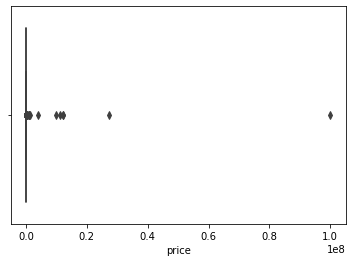

In [18]:
# Mendeteksi outlier

import seaborn as sns

sns.boxplot(cars_data['price'])

In [19]:
# Menentukan nilai dari kolom price berkisar 500 sampai 40000 (sekedar memudahkan pemrosesan saja)
cars_data = cars_data[cars_data['price'].between(500, 40000)]
print(cars_data['price'].sort_values())

47531      500
19806      500
42699      500
4158       500
26574      500
         ...  
38322    39999
2532     39999
31578    40000
13897    40000
41720    40000
Name: price, Length: 38616, dtype: int64


<AxesSubplot:xlabel='price'>

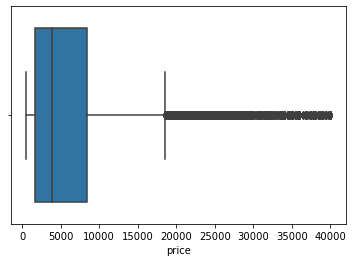

In [20]:
# Cek ulang outlier
sns.boxplot(cars_data['price'])

7. Dari hasil observasi pada nomor 1. Terlihat beberapa kolom memiliki nilai NaN. Lakukan imputasi terhadap data NaN, dengan ketentuan:
    1. jika kolom tersebut bertipe object maka input dengan data mode-nya
    2. jika kolom tersebut bertipe numeric input dengan nilai mediannya

## 4. Feature Engineering

In [21]:
# Imputasi nilai NaN (tipe object --> mode, tipe numerik --> median)
cols1 = cars_data.select_dtypes(['object']).columns
cols2 = cars_data.select_dtypes(['int64']).columns

cars_data[cols1] = cars_data[cols1].fillna(cars_data[cols1].mode().iloc[0])
cars_data[cols2] = cars_data[cols2].fillna(cars_data[cols2].median())

In [22]:
# Cek lagi
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38616 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date_crawled        38616 non-null  datetime64[ns]
 1   price               38616 non-null  int64         
 2   abtest              38616 non-null  object        
 3   vehicle_type        38616 non-null  object        
 4   registration_year   38616 non-null  int64         
 5   gearbox             38616 non-null  object        
 6   power_ps            38616 non-null  int64         
 7   model               38616 non-null  object        
 8   odometer            38616 non-null  int64         
 9   registration_month  38616 non-null  int64         
 10  fuel_type           38616 non-null  object        
 11  brand               38616 non-null  object        
 12  unrepaired_damage   38616 non-null  object        
 13  ad_created          38616 non-null  datetime64

In [23]:
# Target
y = cars_data['price']

# Mempersiapkan data untuk dinormalisasi (kecuali kolom target)
num_norm = cars_data[cols2].drop(['price'], axis=1)
num_norm

,registration_year,power_ps,odometer,registration_month
0,2004,158,150000,3
1,1997,286,150000,6
2,2009,102,70000,7
3,2007,71,70000,6
5,2006,150,150000,4
...,...,...,...,...
49995,2011,239,100000,1
49996,1996,75,150000,5
49997,2014,69,5000,11
49998,2013,150,40000,11


In [24]:
# Normalisasi data tipe numerik
cars_data['registration_year'] = normalize(cars_data['registration_year'].values.reshape(-1, 1), axis=0)
cars_data['power_ps'] = normalize(cars_data['power_ps'].values.reshape(-1, 1), axis=0)
cars_data['odometer'] = normalize(cars_data['odometer'].values.reshape(-1, 1), axis=0)
cars_data['registration_month'] = normalize(cars_data['registration_month'].values.reshape(-1, 1), axis=0)

cars_data

,date_crawled,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,last_seen
0,2016-03-26 17:47:46,5000,control,bus,0.005087,manuell,0.003167,andere,0.005830,0.002121,lpg,peugeot,nein,2016-03-26,2016-04-06 06:45:54
1,2016-04-04 13:38:56,8500,control,limousine,0.005069,automatik,0.005734,7er,0.005830,0.004242,benzin,bmw,nein,2016-04-04,2016-04-06 14:45:08
2,2016-03-26 18:57:24,8990,test,limousine,0.005100,manuell,0.002045,golf,0.002721,0.004949,benzin,volkswagen,nein,2016-03-26,2016-04-06 20:15:37
3,2016-03-12 16:58:10,4350,control,kleinwagen,0.005095,automatik,0.001423,fortwo,0.002721,0.004242,benzin,smart,nein,2016-03-12,2016-03-15 03:16:28
5,2016-03-21 13:47:45,7900,test,bus,0.005092,automatik,0.003007,voyager,0.005830,0.002828,diesel,chrysler,nein,2016-03-21,2016-04-06 09:45:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,24900,control,limousine,0.005105,automatik,0.004791,q5,0.003886,0.000707,diesel,audi,nein,2016-03-27,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,1980,control,cabrio,0.005067,manuell,0.001504,astra,0.005830,0.003535,benzin,opel,nein,2016-03-28,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,13200,test,cabrio,0.005112,automatik,0.001383,500,0.000194,0.007776,benzin,fiat,nein,2016-04-02,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,22900,control,kombi,0.005110,manuell,0.003007,a3,0.001555,0.007776,diesel,audi,nein,2016-03-08,2016-04-05 16:45:07


In [25]:
# Tipe data object
cars_data[cols1]

,abtest,vehicle_type,gearbox,model,fuel_type,brand,unrepaired_damage
0,control,bus,manuell,andere,lpg,peugeot,nein
1,control,limousine,automatik,7er,benzin,bmw,nein
2,test,limousine,manuell,golf,benzin,volkswagen,nein
3,control,kleinwagen,automatik,fortwo,benzin,smart,nein
5,test,bus,automatik,voyager,diesel,chrysler,nein
...,...,...,...,...,...,...,...
49995,control,limousine,automatik,q5,diesel,audi,nein
49996,control,cabrio,manuell,astra,benzin,opel,nein
49997,test,cabrio,automatik,500,benzin,fiat,nein
49998,control,kombi,manuell,a3,diesel,audi,nein


In [26]:
# Ordinal
cars_data['abtest'].value_counts()

test       19889
control    18727
Name: abtest, dtype: int64

In [27]:
abtest = {'control':1, 'test':2}
cars_data['abtest'] = cars_data['abtest'].replace(abtest)

In [28]:
# Nominal
cars_data['vehicle_type'].value_counts()

limousine     12763
kleinwagen     8061
kombi          7635
bus            3535
cabrio         2602
coupe          2036
suv            1730
andere          254
Name: vehicle_type, dtype: int64

In [29]:
# Ordinal
cars_data['gearbox'].value_counts()

manuell      29859
automatik     8757
Name: gearbox, dtype: int64

In [30]:
# Mengganti istilah bahasa Jerman ke bahasa Inggris
gear = {'manuell': 'manual', 'automatik': 'automatic'}
cars_data['gearbox'] = cars_data['gearbox'].map(gear)

In [31]:
gearbox = {'automatic': 1, 'manual': 2}
cars_data['gearbox'] = cars_data['gearbox'].replace(gearbox)

In [32]:
# Nominal
cars_data['model'].value_counts()

golf          4445
andere        2690
3er           2293
polo          1193
passat        1163
              ... 
kappa            2
rangerover       1
200              1
b_max            1
samara           1
Name: model, Length: 243, dtype: int64

In [33]:
# Ordinal
cars_data['fuel_type'].value_counts()

benzin     25246
diesel     12671
lpg          581
cng           62
hybrid        36
elektro       12
andere         8
Name: fuel_type, dtype: int64

In [34]:
# Mengganti istilah bahasa Jerman ke bahasa Inggris
other = {'andere':'others'}
cars_data['fuel_type'] = cars_data['fuel_type'].replace(other)

In [35]:
fuel = {'elektro': 1, 'hybrid': 2, 'cng':3, 'lpg':4, 'diesel':5, 'benzin':6, 'others':7}
cars_data['fuel_type'] = cars_data['fuel_type'].replace(fuel)

In [36]:
# Ordinal
cars_data['brand'].value_counts()

volkswagen        8196
bmw               4547
mercedes_benz     3908
opel              3854
audi              3537
ford              2489
renault           1675
peugeot           1125
fiat               913
seat               738
skoda              697
smart              585
nissan             583
mazda              574
citroen            538
toyota             531
hyundai            409
mini               392
volvo              377
honda              312
mitsubishi         299
sonstige_autos     293
kia                290
alfa_romeo         262
suzuki             236
chevrolet          228
porsche            149
chrysler           139
dacia              114
jeep                93
daihatsu            78
land_rover          76
subaru              75
saab                67
jaguar              61
rover               46
daewoo              45
lancia              39
trabant             27
lada                19
Name: brand, dtype: int64

In [37]:
# Menentukan urutan ordinal data berdasarkan harga kendaraan
top_brands = cars_data.groupby(['brand'])['price'].mean()
top_brands.sort_values(ascending=False)

brand
porsche           21132.543624
land_rover        13546.131579
jaguar            11121.704918
jeep              10988.225806
mini              10746.308673
sonstige_autos    10509.266212
audi               9456.975686
bmw                8532.978667
mercedes_benz      8462.089816
skoda              6858.177905
kia                6487.024138
chevrolet          6359.105263
dacia              6178.140351
volkswagen         6054.775866
hyundai            5938.002445
nissan             5462.825043
toyota             5422.491525
volvo              5334.066313
subaru             5025.453333
seat               4997.676152
mazda              4777.388502
suzuki             4612.733051
honda              4485.842949
ford               4379.007634
alfa_romeo         4269.148855
citroen            4144.141264
mitsubishi         3995.909699
chrysler           3829.654676
smart              3778.892308
saab               3622.358209
opel               3568.024909
peugeot            3508.259556
fi

In [39]:
brand = {'porsche': 1, 'land_rover': 2, 'jaguar':3, 'jeep':4, 'mini':5, 'sonstige_autos':6, 'audi':7, 'bmw':8,
         'mercedes_benz':9, 'skoda':10, 'kia':11, 'chevrolet':12, 'dacia':13, 'volkswagen':14, 'hyundai':15, 'nissan':16, 
         'toyota':17, 'volvo':18, 'subaru':19, 'seat':20, 'mazda':21, 'suzuki':22, 'honda':23, 'ford':24, 'alfa_romeo':25,
            'citroen':26, 'mitsubishi':27, 'chrysler':28, 'smart':29, 'saab':30, 'opel':31, 'peugeot':32, 'fiat':33,
            'lancia':34, 'lada':35, 'renault':36, 'trabant':37, 'daihatsu':38, 'rover':39, 'daewoo':40}

cars_data['fuel_type'] = cars_data['fuel_type'].replace(brand)

In [40]:
# Ordinal
cars_data['unrepaired_damage'].value_counts()

nein    35538
ja       3078
Name: unrepaired_damage, dtype: int64

In [41]:
# Mengganti istilah bahasa Jerman ke bahasa Inggris
unrepaired = {'nein':'no', 'ja':'yes'}
cars_data['unrepaired_damage'] = cars_data['unrepaired_damage'].replace(unrepaired)

In [42]:
unrepaired_damage = {'yes': 1, 'no': 2}
cars_data['unrepaired_damage'] = cars_data['unrepaired_damage'].replace(unrepaired_damage)

In [44]:
# Inputkan Kode disini
cars_data = pd.get_dummies(cars_data, columns = ['vehicle_type'])
cars_data = pd.get_dummies(cars_data['model'])
cars_data

,100,145,147,156,159,1_reihe,1er,200,2_reihe,300c,...,wrangler,x_reihe,x_trail,x_type,xc_reihe,yaris,yeti,ypsilon,z_reihe,zafira
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
